# Plotting Input Variables

In [1]:
import uproot 
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt

Open the file, then extract variables

In [2]:
with uproot.open("nts.brownd.KKSeed.KKSM.001210_00000005.root") as file:
    trkana = file["TAKK"]["trkana"].arrays(filter_name="/de|detsh|detshmc|demc/i")
    trkana = trkana[(trkana['de.goodfit']==1)&(trkana['de.status']>0)&(trkana['demc.proc']==167)]

In [3]:
n_events = 1000000
    
udt = ak.concatenate(trkana['detsh.udt'][:n_events]).to_numpy()
udoca = ak.concatenate(trkana['detsh.udoca'][:n_events]).to_numpy()
rdrift = ak.concatenate(trkana['detsh.rdrift'][:n_events]).to_numpy()
tottdrift = ak.concatenate(trkana['detsh.tottdrift'][:n_events]).to_numpy()
edep = ak.concatenate(trkana['detsh.edep'][:n_events]).to_numpy()
udocavar = ak.concatenate(trkana['detsh.udocavar'][:n_events]).to_numpy()
wdist = ak.concatenate(trkana['detsh.wdist'][:n_events]).to_numpy()
uupos = ak.concatenate(trkana['detsh.uupos'][:n_events]).to_numpy()
rho = np.square(ak.concatenate(trkana['detsh.poca.fCoordinates.fX'][:n_events]).to_numpy())
rho = np.add(rho,np.square(ak.concatenate(trkana['detsh.poca.fCoordinates.fY'][:n_events]).to_numpy()))
rho = np.sqrt(rho)
input_dataset = np.vstack((udt,udoca,rdrift,tottdrift,edep,udocavar,wdist,uupos,rho)).T
# print(input_dataset.shape[0])
# print(input_dataset.shape[1])

Label signal and background and make separate V-stacks for each

In [4]:
mcrel = []

for i, this_dt in enumerate(trkana['detsh.udt'][:n_events]):
    mcrel.extend(trkana['detshmc.rel._rel'][i][:len(this_dt)])
    
mcrel = np.array(mcrel)
true_ce = mcrel==0
    
signal = true_ce
bkg = mcrel ==-1

In [5]:
min_len = min(len(input_dataset[signal]), len(input_dataset[bkg]))
signal_dataset = input_dataset[signal][:min_len]
print(signal_dataset)
print(signal_dataset.shape[0])
print(signal_dataset.shape[1])

bkg_dataset = input_dataset[bkg][:min_len]

[[  17.451826     -2.1174026     1.1482927  ...   66.06702
   110.070816    442.5       ]
 [  22.096222      0.90193874    1.4084237  ...  116.5227
   102.78195     458.125     ]
 [   8.004191     -0.52375686    0.54706156 ...  111.576744
    97.34822     461.25003   ]
 ...
 [  24.643866     -2.7801974     1.5468279  ... -178.86061
  -228.95427     426.87503   ]
 [  32.005886     -1.154044      1.9753479  ...  354.07382
   320.44968     389.375     ]
 [  24.562792     -0.98044527    1.5598382  ...  263.8583
   313.57        392.5       ]]
5995
9


Fill lists with variable data, then graph 

<function matplotlib.pyplot.show(close=None, block=None)>

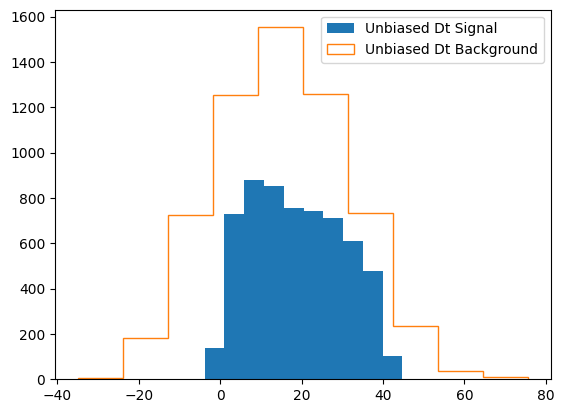

In [6]:
udt_sig = []
udoca_sig = []
tottdrift_sig = []
rdrift_sig = []
edep_sig = []
udocavar_sig = []
wdist_sig = []
uupos_sig = []
rho_sig = []

#loop through first column to where?
for i in range(signal_dataset.shape[0]):
    udt_sig.append(signal_dataset[i][0])
    
for i in range(signal_dataset.shape[0]):
    udoca_sig.append(signal_dataset[i][1])
    
for i in range(signal_dataset.shape[0]):
    tottdrift_sig.append(signal_dataset[i][2])
    
for i in range(signal_dataset.shape[0]):
    rdrift_sig.append(signal_dataset[i][3])
    
for i in range(signal_dataset.shape[0]):
    edep_sig.append(signal_dataset[i][4])
    
for i in range(signal_dataset.shape[0]):
    udocavar_sig.append(signal_dataset[i][5])
    
for i in range(signal_dataset.shape[0]):
    wdist_sig.append(signal_dataset[i][6])

for i in range(signal_dataset.shape[0]):
    uupos_sig.append(signal_dataset[i][7])
    
for i in range(signal_dataset.shape[0]):
    rho_sig.append(signal_dataset[i][8])
    
udt_back = []
udoca_back = []
tottdrift_back = []
rdrift_back = []
edep_back = []
udocavar_back = []
wdist_back = []
uupos_back = []
rho_back = []

#loop through first column to where?
for i in range(bkg_dataset.shape[0]):
    udt_back.append(bkg_dataset[i][0])
    
for i in range(bkg_dataset.shape[0]):
    udoca_back.append(bkg_dataset[i][1])
    
for i in range(bkg_dataset.shape[0]):
    tottdrift_back.append(bkg_dataset[i][2])
    
for i in range(bkg_dataset.shape[0]):
    rdrift_back.append(bkg_dataset[i][3])
    
for i in range(bkg_dataset.shape[0]):
    edep_back.append(bkg_dataset[i][4])
    
for i in range(bkg_dataset.shape[0]):
    udocavar_back.append(bkg_dataset[i][5])
    
for i in range(bkg_dataset.shape[0]):
    wdist_back.append(bkg_dataset[i][6])

for i in range(bkg_dataset.shape[0]):
    uupos_back.append(bkg_dataset[i][7])
    
for i in range(bkg_dataset.shape[0]):
    rho_back.append(bkg_dataset[i][8])

plt.hist(udt_sig,label="Unbiased Dt Signal")
plt.hist(udt_back,label="Unbiased Dt Background", histtype='step')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

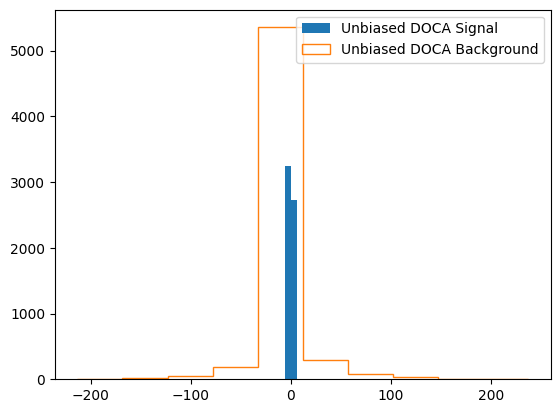

In [7]:
plt.hist(udoca_sig,label="Unbiased DOCA Signal")
plt.hist(udoca_back,label="Unbiased DOCA Background", histtype='step')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

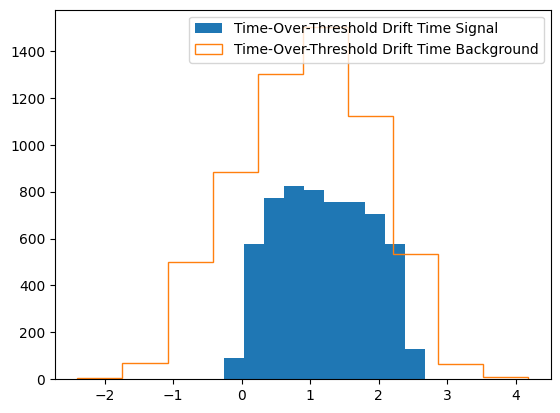

In [8]:
plt.hist(tottdrift_sig,label="Time-Over-Threshold Drift Time Signal")
plt.hist(tottdrift_back,label="Time-Over-Threshold Drift Time Background", histtype='step')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

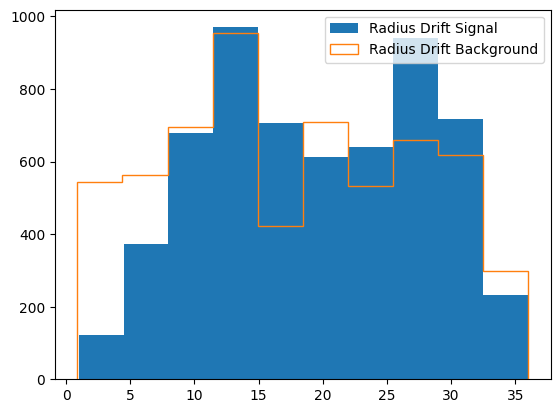

In [9]:
plt.hist(rdrift_sig,label="Radius Drift Signal")
plt.hist(rdrift_back,label="Radius Drift Background", histtype='step')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

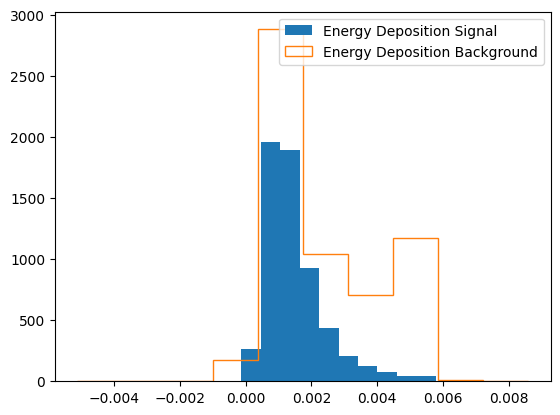

In [10]:
plt.hist(edep_sig,label="Energy Deposition Signal")
plt.hist(edep_back,label="Energy Deposition Background", histtype='step')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

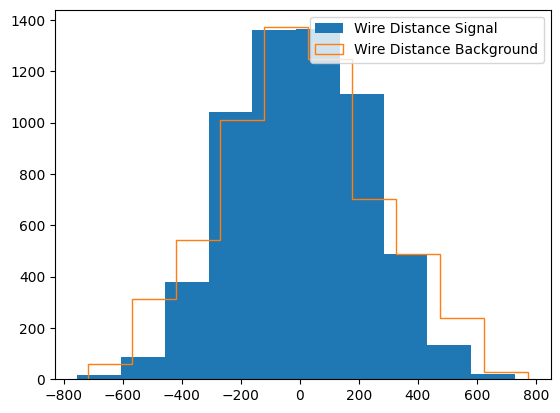

In [11]:
plt.hist(wdist_sig,label="Wire Distance Signal")
plt.hist(wdist_back,label="Wire Distance Background", histtype='step')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

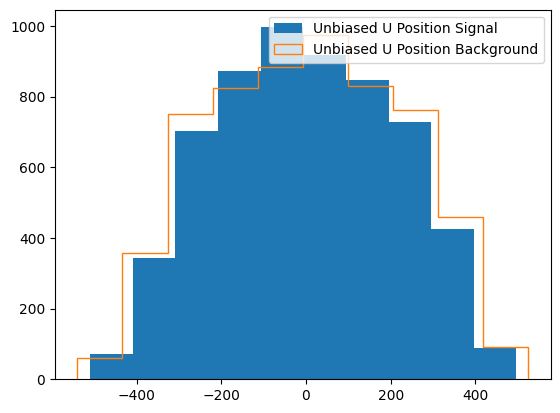

In [12]:
plt.hist(uupos_sig,label="Unbiased U Position Signal")
plt.hist(uupos_back,label="Unbiased U Position Background", histtype='step')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

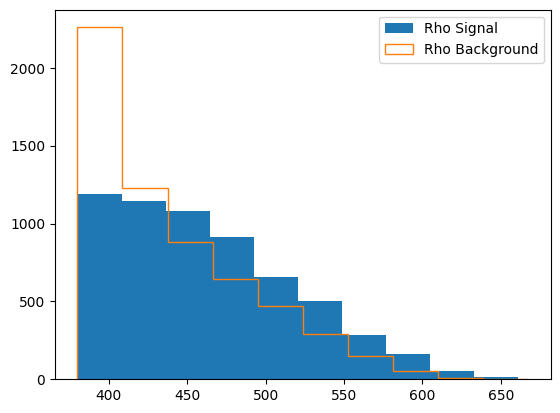

In [13]:
plt.hist(rho_sig,label="Rho Signal")
plt.hist(rho_back,label="Rho Background", histtype='step')
plt.legend()
plt.show